In [219]:
import jax
import jax.numpy as jnp
import jax.tree_util as tree

import numpy as np
import random as built_in_random
import flax
import optax

from tqdm.notebook import tqdm

import jraph
import networkx as nx

import matplotlib.pyplot as plt
import pickle

In [35]:
generate_random_key = lambda: (SEED := np.random.randint(0, 999999999), jax.random.PRNGKey(SEED))

In [16]:
def convert_jraph_to_networkx_graph(jraph_graph: jraph.GraphsTuple) -> nx.Graph:
    nodes, edges, receivers, senders, _, _, _ = jraph_graph
    nx_graph = nx.DiGraph()
    if nodes is None:
        for n in range(jraph_graph.n_node[0]):
            nx_graph.add_node(n)
    else:
        for n in range(jraph_graph.n_node[0]):
            nx_graph.add_node(n, node_feature=nodes[n])
    if edges is None:
        for e in range(jraph_graph.n_edge[0]):
            nx_graph.add_edge(int(senders[e]), int(receivers[e]))
    else:
        for e in range(jraph_graph.n_edge[0]):
            nx_graph.add_edge(int(senders[e]), int(receivers[e]), edge_feature=edges[e])

    return nx_graph


def draw_jraph_graph_structure(jraph_graph: jraph.GraphsTuple) -> None:
    nx_graph = convert_jraph_to_networkx_graph(jraph_graph)
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, pos=pos, with_labels=True, node_size=500, font_color='yellow')

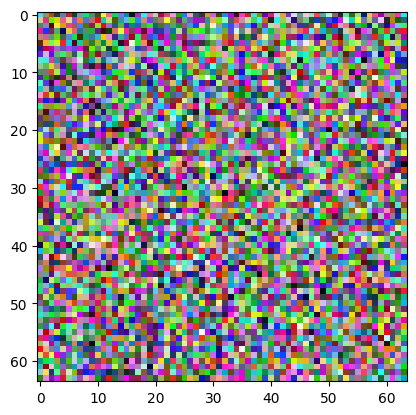

In [202]:
def _generate_random_color_image(size=(256, 256)):
    seed, rnd_key = generate_random_key()
    random_rect = jax.random.uniform(rnd_key, shape=(*size, 3))
    return random_rect

origin = _generate_random_color_image((64, 64))
plt.imshow(origin)

In [301]:
def build_toy_graph(
    node_num_range = (64, 65),
    image_size = (8, 8),
    gen_edge_p = 0.05
) -> jraph.GraphsTuple:
    """Define a four node graph, each node has a scalar as its feature."""
    
    def _generate_random_color_image():
        seed, rnd_key = generate_random_key()
        random_rect = jax.random.uniform(rnd_key, shape=(*image_size, 3))
        return random_rect

    
    node_num = np.random.randint(*node_num_range)
    
    node_features = jnp.array([
         _generate_random_color_image() for i in range(node_num)
    ])
    
    senders = []
    receivers = []
    
    edge_num = 0
    
    senders = jnp.array(senders)
    receivers = jnp.array(receivers)

    edges = jnp.array([j for j in range(edge_num)])

    n_node = jnp.array([node_num])
    n_edge = jnp.array([edge_num])

    global_context = jnp.array([[1]]) # Same feature dims as nodes and edges.
    
    graph = jraph.GraphsTuple(
        nodes=node_features,
        edges=edges,
        senders=senders,
        receivers=receivers,
        n_node=n_node,
        n_edge=n_edge,
        globals=global_context
    )
    return graph

In [302]:
toy_g = build_toy_graph()

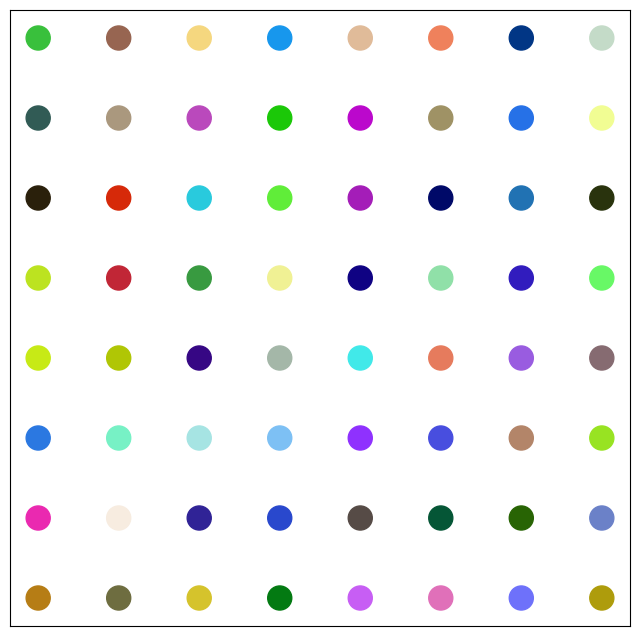

In [326]:
pos, colors, labels = dict(), dict(), dict()
toy_nx = convert_jraph_to_networkx_graph(toy_g)
for i, img in enumerate(toy_g.nodes):
    pos[i] = i // int(toy_g.n_node ** 0.5), i % int(toy_g.n_node ** 0.5)
    colors[i] = img[0][0]
    labels[i] = ""
plt.figure(figsize=(8, 8))

nx.draw_networkx(toy_nx, pos=pos, labels=labels, node_color=list(colors.values()))

GraphsTuple(nodes=DeviceArray([[[[7.13359952e-01, 4.91563678e-01, 8.30186605e-02],
               [1.51420951e-01, 9.95796800e-01, 6.45220876e-01],
               [2.78667212e-01, 2.87895560e-01, 9.56255913e-01],
               ...,
               [7.34369636e-01, 6.29145265e-01, 2.02736378e-01],
               [3.33664417e-02, 3.55831385e-01, 5.34679532e-01],
               [4.84515905e-01, 7.66474724e-01, 3.01672101e-01]],

              [[7.31793642e-02, 5.75647354e-01, 1.10677481e-02],
               [7.84498572e-01, 4.89906073e-02, 5.46304822e-01],
               [9.92026567e-01, 9.77868676e-01, 2.61600375e-01],
               ...,
               [4.05801535e-01, 9.50433493e-01, 7.66760468e-01],
               [6.15532160e-01, 4.56906438e-01, 2.58118033e-01],
               [9.05584574e-01, 1.30618095e-01, 5.82699418e-01]],

              [[3.89677286e-01, 5.77656150e-01, 8.67313862e-01],
               [1.98683739e-02, 2.26952672e-01, 9.55186605e-01],
               [6.93280578e-